<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista1/Resposta_da_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

## Group
* Airton Everton;
* Carlos Frederico.

## OBS Professor

A seção abaixo("Download files from Drive") não precisa ser executada, é só fazer o upload dos arquivos no menu lateral esquerdo e verificar se os nome estão iguais aos nomes da seção "Load Files".

# Download files from Drive

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# id folder shared in drive
id_folder_drive = '1qajJn0BYQuvkRnZiiEX4rFFUP0zy4V1W'

# get all files in folder
file_list = drive.ListFile({ 'q': "'%s' in parents and trashed=false" % id_folder_drive }).GetList()

for f in file_list:
  # files filter
  if '.ipynb' not in f['title'] and '.pdf' not in f['title']:
    # download file
    f.GetContentFile(f['title'])

# Imports

In [2]:
import cv2
import imutils
from PIL import Image
import numpy as np
from numpy import fft
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, DBSCAN
from pylab import rcParams
from scipy import stats
import seaborn as sn
import math
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Files

In [3]:
conjunto1 = pd.read_excel('Lista1_Conjunto1.xlsx')

# Question A

In [4]:
normal = pd.DataFrame({
    'X': np.random.normal(0, 0.1, 1000),
    'Y': np.random.normal(0, 0.1, 1000)})

normal

,X,Y
0,-0.086844,0.103442
1,-0.039267,-0.083923
2,0.104624,0.034082
3,0.011846,0.040665
4,0.039168,-0.022077
...,...,...
995,0.046370,0.246662
996,0.066893,-0.083885
997,-0.178124,-0.113483
998,-0.060862,-0.043346


## 1)

In [5]:
def print_info_var(data, var):
  print('Média de %s:' % var, data[var].mean())
  print('Mediana de %s:' % var, data[var].median())
  print('Moda de %s:' % var, stats.mode(data[var])[0][0])
  print('Variância de %s:' % var, data[var].var())
  print('Desvio padrão de %s:' % var, data[var].std())
  print()

print_info_var(normal, 'X')
print_info_var(normal, 'Y')

Média de X: -0.0015184520956852134
Mediana de X: -0.0018531200839999283
Moda de X: -0.2781336268265308
Variância de X: 0.009923598795729422
Desvio padrão de X: 0.0996172615349841

Média de Y: 0.003712941575312067
Mediana de Y: 0.004872247770179301
Moda de Y: -0.28268184919160394
Variância de Y: 0.009453936432861798
Desvio padrão de Y: 0.09723135519400004



## 2)

Hist normal X


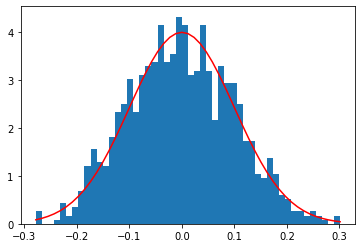

Hist normal Y


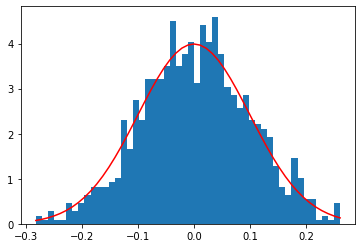

In [6]:
def show_hist(var, show_line = True):
  _, bins, _ = plt.hist(var, 50, density=True)
  if show_line:
    plt.plot(bins, 1/(0.1 * np.sqrt(2 * np.pi)) * np.exp(-bins**2 / (2 * 0.1**2)), color='r')
  plt.show()

print('Hist normal X')
show_hist(normal.X)
print('Hist normal Y')
show_hist(normal.Y)

## 3)

In [7]:
def print_more_info_var(data, var):
  print('Coeficiente de assimetria de %s:' % var, stats.skew(data[var]))
  print('Curtose de %s:' % var, stats.kurtosis(data[var]))
  print()

print_more_info_var(normal, 'X')
print_more_info_var(normal, 'Y')

Coeficiente de assimetria de X: 0.09683165416768515
Curtose de X: -0.3120413022165973

Coeficiente de assimetria de Y: -0.031901452577859354
Curtose de Y: -0.16865314963141032



## 4)

Q-Q Plot normal X:


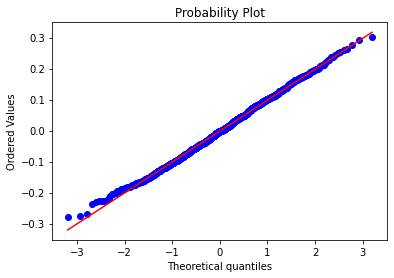

Q-Q Plot normal Y:


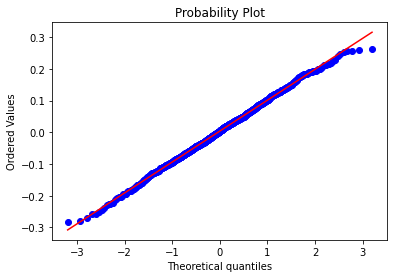

In [8]:
print('Q-Q Plot normal X:')
stats.probplot(normal.X, plot=plt, )
plt.show()

print('Q-Q Plot normal Y:')
stats.probplot(normal.Y, plot=plt)
plt.show()

## 5)

Covariância


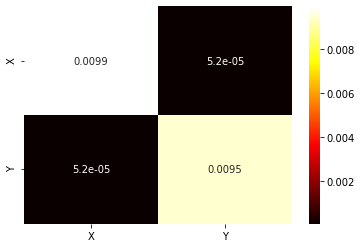

Correlação


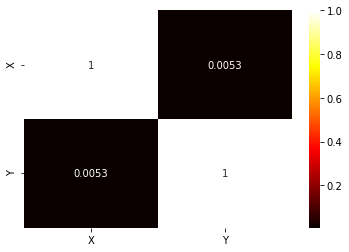

In [9]:
print('Covariância')
sn.heatmap(normal.cov(), cmap='hot', annot=True)
plt.show()

print('Correlação')
sn.heatmap(normal.corr(), cmap='hot', annot=True)
plt.show()

As Matrizes de covariancia e correlação indicam ambas graus de relação entre as variáveis.

Covariância é o valor de variancia relacinadas as duas variáveis.
Correlação é o valor de dependencia linear entre variáveis.


## 6)

Quando a correlação é positiva quer dizer que as variáveis movem-se juntas, por exemplo, se uma cresce a outra cresce. Quanto mais próximo de 1 mais forte a correlação positiva.

Quando a correlação é negativa quer dizer que as variáveis movem-se em direções opostas, por exemplo, se uma cresce a outra diminui. Quanto mais próximo de -1 mais forte a correlação negativa.

Quando mais a correlação se aproxima de 0(zero) representa a não existência de correlação entre as variáveis, por exemplo, se uma cresce não quer dizer que a outra cresce.

# Question B

In [10]:
uniform = pd.DataFrame({
    'X': np.random.uniform(0, 0.1, 1000),
    'Y': np.random.uniform(0, 0.1, 1000)})

uniform

,X,Y
0,0.010102,0.080758
1,0.066907,0.024876
2,0.050069,0.017895
3,0.090997,0.014268
4,0.054801,0.052988
...,...,...
995,0.093162,0.089118
996,0.091841,0.088039
997,0.001944,0.000071
998,0.041576,0.064899


## 1)

In [11]:
print_info_var(uniform, 'X')
print_info_var(uniform, 'Y')

Média de X: 0.04987551358403014
Mediana de X: 0.050049179078293204
Moda de X: 0.00011157597900701699
Variância de X: 0.0008520573344074693
Desvio padrão de X: 0.02919002114434776

Média de Y: 0.04924436760813824
Mediana de Y: 0.048519077080960885
Moda de Y: 7.121942877195143e-05
Variância de Y: 0.0008058400798808062
Desvio padrão de Y: 0.02838732252046336



## 2)

Hist uniform X


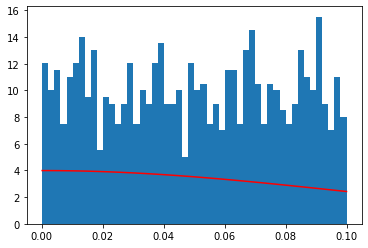

Hist uniform Y


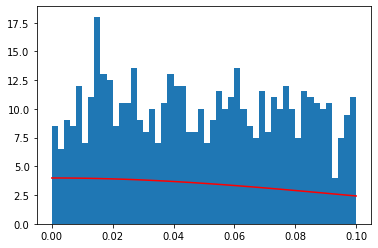

In [12]:
print('Hist uniform X')
show_hist(uniform.X)
print('Hist uniform Y')
show_hist(uniform.Y)

## 3)

In [13]:
print_more_info_var(uniform, 'X')
print_more_info_var(uniform, 'Y')

Coeficiente de assimetria de X: -0.016390902672863222
Curtose de X: -1.2351180300162194

Coeficiente de assimetria de Y: 0.05309787311847023
Curtose de Y: -1.208806053240435



## 4)

Q-Q Plot uniform X:


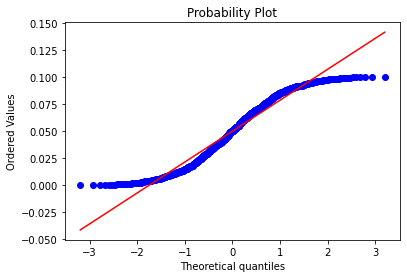

Q-Q Plot uniform Y:


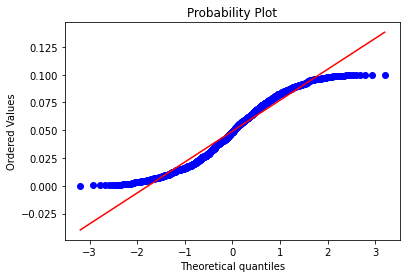

In [14]:
print('Q-Q Plot uniform X:')
stats.probplot(uniform.X, plot=plt, )
plt.show()

print('Q-Q Plot uniform Y:')
stats.probplot(uniform.Y, plot=plt)
plt.show()

## 5)

Covariância


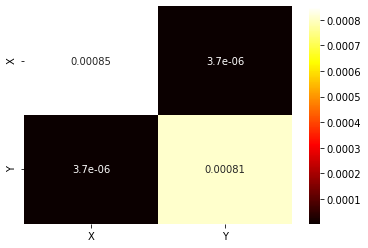

Correlação


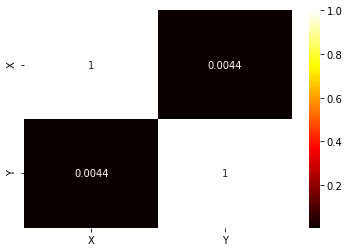

In [15]:
print('Covariância')
sn.heatmap(uniform.cov(), cmap='hot', annot=True)
plt.show()

print('Correlação')
sn.heatmap(uniform.corr(), cmap='hot', annot=True)
plt.show()

&&&&&&&&&&&&&&&&&&&&&&

Calcule as matrizes de covariância e de correlação e descreva o que cada uma representa.

## 6)

No caso da covariância teremos um resultado um pouco diferente estre as variáveis randomicas uniforme e randomicas normais por conta justamente da sua variância estar atrelada ao seu formato.

Na variavél uniforme todos os valores do intervalo possuem em teoria a mesma possibilidade de serem gerados. Isso acaba que naturalmente a variável tenha uma variância um pouco maior.

Já na variável normal, como essa segue a distribuição normal, é mais natural que a variância ou covariância seja menor, por conta justamente da distribuição seguir a propabilidade normal.

Isso já não ocorre na Correlação. Já que a mesma é o grau de dependencia linear entre as variáves ambas, distribuição normal e uniforme tiveram valores bem proximos a 0 quando comparadas ex.: X e Y por justamente serem criadas independentes.

# Question C

In [16]:
conj1 = conjunto1.dropna(how='all')
conj1 = conj1.dropna(axis=1, how='all')
conj1.columns = conj1.iloc[0]
conj1 = conj1[1:]
conj1 = conj1.astype('float32')
conj1

1,V1,V2,V3,V4,V5,V6
2,5.1,3.5,4.95,1.4,1.960000,0.2
3,4.9,3.0,5.30,1.4,1.960000,0.2
4,4.7,3.2,4.60,1.3,1.690000,0.2
5,4.6,3.1,4.55,1.5,2.250000,0.2
6,5.0,3.6,4.60,1.4,1.960000,0.2
...,...,...,...,...,...,...
147,6.7,3.0,8.90,5.2,27.040001,2.3
148,6.3,2.5,8.85,5.0,25.000000,1.9
149,6.5,3.0,8.50,5.2,27.040001,2.0
150,6.2,3.4,7.30,5.4,29.160000,2.3


## 1)



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V1

Média de V1: 5.843334674835205
Mediana de V1: 5.800000190734863
Moda de V1: 5.0
Variância de V1: 0.685693085193634
Desvio padrão de V1: 0.8280658721923828

Hist V1


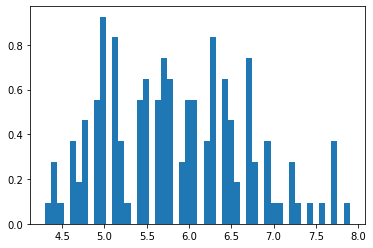

Coeficiente de assimetria de V1: 0.31175339221954346
Curtose de V1: -0.5735682660197354

Q-Q Plot V1:


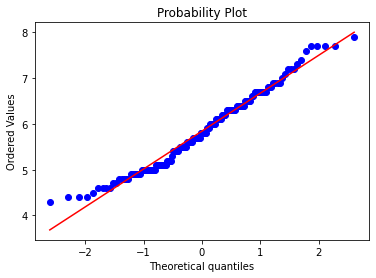

Normalize [0-1] V1:


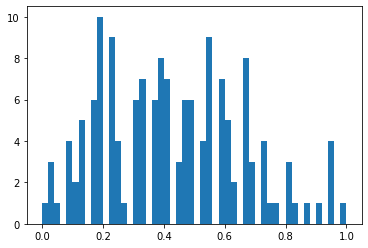

Z-score V1:


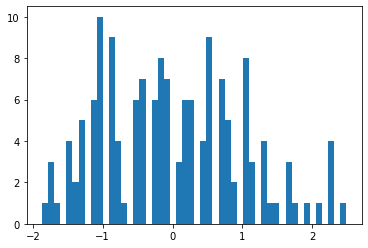



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V2

Média de V2: 3.05733323097229
Mediana de V2: 3.0
Moda de V2: 3.0
Variância de V2: 0.1899794191122055
Desvio padrão de V2: 0.4358662962913513

Hist V2


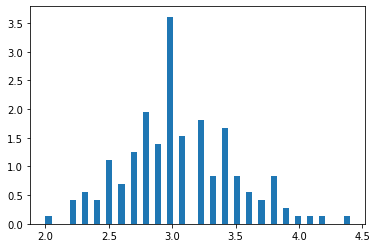

Coeficiente de assimetria de V2: 0.3157661259174347
Curtose de V2: 0.18097507293213422

Q-Q Plot V2:


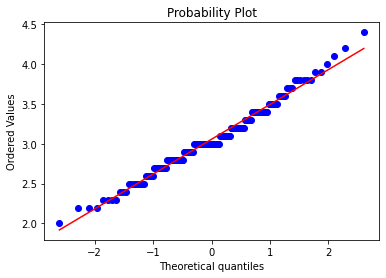

Normalize [0-1] V2:


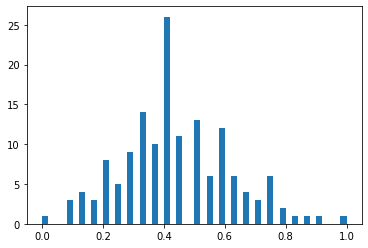

Z-score V2:


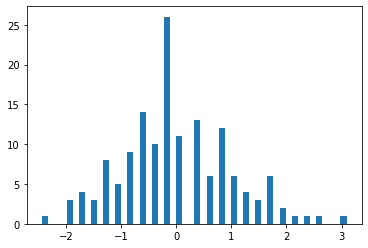



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V3

Média de V3: 7.100668907165527
Mediana de V3: 7.400000095367432
Moda de V3: 4.5
Variância de V3: 3.4248313903808594
Desvio padrão de V3: 1.8506300449371338

Hist V3


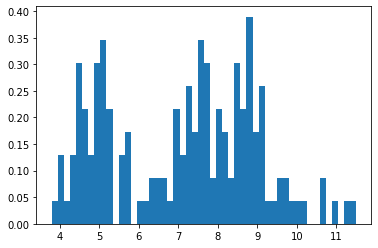

Coeficiente de assimetria de V3: 0.008850334212183952
Curtose de V3: -0.9745857553365753

Q-Q Plot V3:


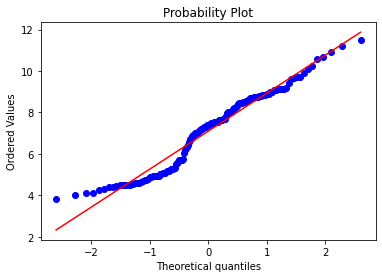

Normalize [0-1] V3:


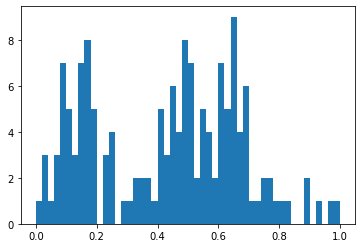

Z-score V3:


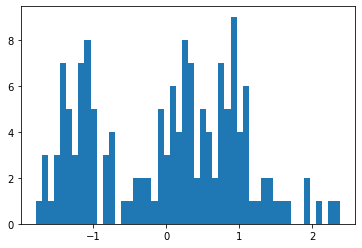



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V4

Média de V4: 3.758000135421753
Mediana de V4: 4.350000381469727
Moda de V4: 1.4
Variância de V4: 3.1162800788879395
Desvio padrão de V4: 1.765298843383789

Hist V4


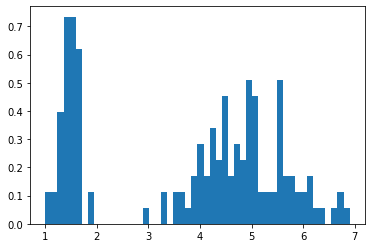

Coeficiente de assimetria de V4: -0.2721278965473175
Curtose de V4: -1.3955356772557854

Q-Q Plot V4:


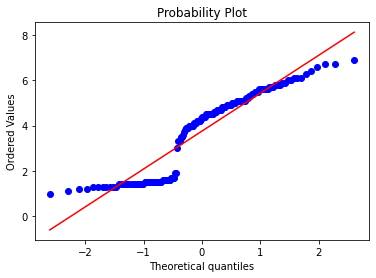

Normalize [0-1] V4:


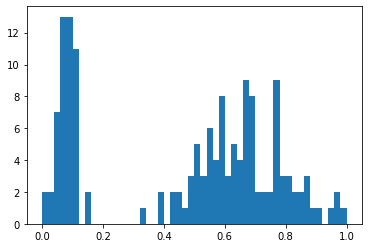

Z-score V4:


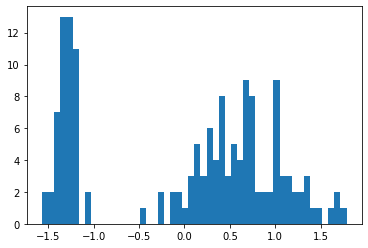



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V5

Média de V5: 17.218069076538086
Mediana de V5: 18.924999237060547
Moda de V5: 1.96
Variância de V5: 159.4422607421875
Desvio padrão de V5: 12.627044677734375

Hist V5


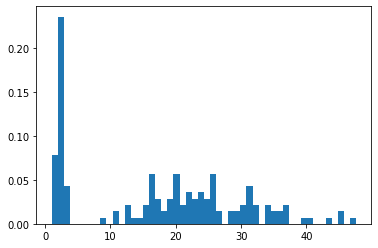

Coeficiente de assimetria de V5: 0.18458963930606842
Curtose de V5: -1.0147470715985414

Q-Q Plot V5:


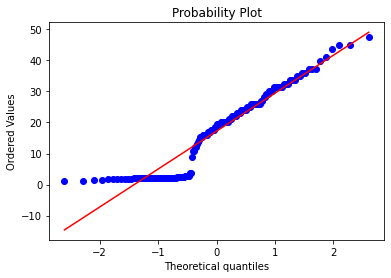

Normalize [0-1] V5:


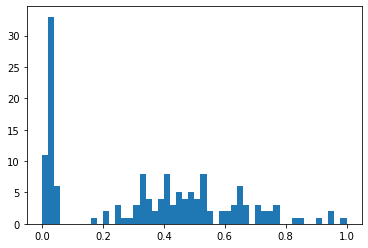

Z-score V5:


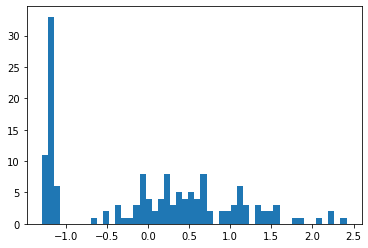



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var V6

Média de V6: 1.1993335485458374
Mediana de V6: 1.2999999523162842
Moda de V6: 0.2
Variância de V6: 0.5810063481330872
Desvio padrão de V6: 0.7622377276420593

Hist V6


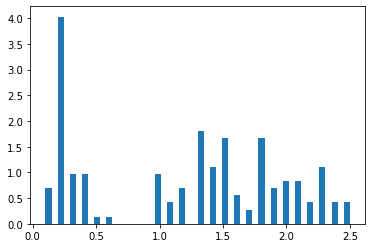

Coeficiente de assimetria de V6: -0.10193416476249695
Curtose de V6: -1.3360674699119177

Q-Q Plot V6:


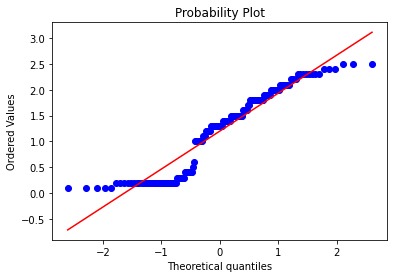

Normalize [0-1] V6:


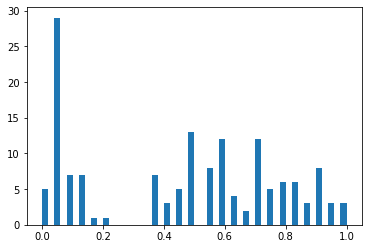

Z-score V6:


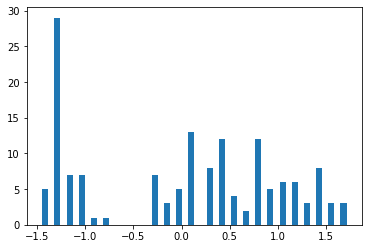

In [17]:
for var in conj1.columns:
  print('\n\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start Var %s\n' % var)
  data_var = conj1[var]

  print_info_var(conj1, var)

  print('Hist %s' % var)
  show_hist(data_var, False)

  print_more_info_var(conj1, var)

  print('Q-Q Plot %s:' % var)
  stats.probplot(data_var, plot=plt)
  plt.show()

  print('Normalize [0-1] %s:' % var)
  plt.hist((data_var - data_var.min()) / (data_var.max() - data_var.min()), 50)
  plt.show()

  print('Z-score %s:' % var)
  plt.hist(stats.zscore(data_var), 50)
  plt.show()

## 2)

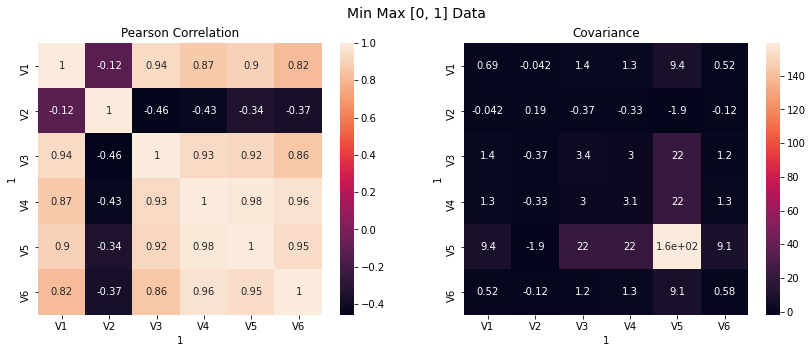

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('Min Max [0, 1] Data', fontsize=14)

ax = sn.heatmap(conj1.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sn.heatmap(conj1.cov(), annot=True)
ax.set_title('Covariance')

plt.show()

## 3)

A variável V4 e a V5 possuem 0.98 de correlação positiva entre si, e são as mais correlacionadas. Logo abaixo temos a V4 com a V6, tendo 0.96.

A variável V1 e a V2 possuem -0.12 de correlação negativa entre si, e são as menos correlacionadas. Logo acima temos a V2 com a V5, tendo -0.34.

## 4)

In [19]:
np.linalg.matrix_rank(conj1)

5

Temos apenas 5 colunas linearmente independentes presentes na matriz, ou seja, uma das variáveis não se encaixou.